# TODO

* ~~надо придумать как батчи пихнуть (var_text)~~
* ~~"pack" the sequences in PyTorch~~
* Придумать метрику

# Imports

In [1]:
#import keras
import datasets
import numpy as np
import transformers
import sklearn.metrics
#import tensorflow as tf
import tqdm.notebook as tqdm
import sklearn.model_selection
import matplotlib.pyplot as plt

/home/bob1ch/Рабочий стол/NN-NLP/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
#pytorch
import torch
from torcheval.metrics.functional import multiclass_auroc
#from torchsummary import summary

from sklearn.model_selection import train_test_split

In [3]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#     try:
#         tf.config.experimental.set_memory_growth(gpus[0], True)
#     except:
#         pass

# Dataset

Load the dataset (we will be using [go_emotions](https://huggingface.co/datasets/google-research-datasets/go_emotions)). Pretokenize data or make a loader that tokenizes the sentenses as you iterate through the dataset. Implement two datasets: variable and fixed sentence length (in tokens). Don't forget to split the dataset into train and test subsets

In [4]:
dataset = datasets.load_dataset('google-research-datasets/go_emotions', name='raw', split='train')

In [5]:
emotions = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
    'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
    'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
    'remorse', 'sadness', 'surprise', 'neutral'
]

In [6]:
tokenizer = transformers.AutoTokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token
tokenizer.eos_token_id

/home/bob1ch/Рабочий стол/NN-NLP/venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


50256

In [7]:
longets_text = dataset['text'][np.argmax(list(map(len, dataset['text'])))]
print(longets_text)
tokenizer(longets_text, return_tensors='pt', padding='max_length', max_length=185, truncation=True)['input_ids']

This person is the smartest person to play town of salem literally 999999999999999999999999999999999999999999999999999999999999999999999999999999999999999991000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001234567898765432345676543345678987654345678909876543234567898765432345678909876543234567898765432345678987654323456787654345676543456543456434543434343434323456765434567654323454323456543345678987654323456789876565656565656565656565656565454545654565454323456765432345678765456 IQ


tensor([[ 1212,  1048,   318,   262, 44730,  1048,   284,   711,  3240,   286,
          3664,   368,  7360,   860, 24214, 24214, 24214, 24214, 24214, 24214,
         24214, 24214, 24214, 24214, 24214, 24214, 24214, 24214, 24214, 24214,
         24214, 24214, 24214, 24214, 24214, 24214,    16, 25645, 25645, 25645,
         25645, 25645, 25645, 25645, 25645, 25645, 25645, 25645, 25645, 25645,
         25645, 25645, 25645,  8269,   405, 10163,  2231, 30924,  4089, 29143,
          3559,  1954,  2231,  3134, 39111,  2091,  2231, 30924,  4089, 29143,
          3559,  2231,  3134,  4531,  2931,  5774,  2996,  3559,  1954,  2231,
         30924,  4089, 29143,  3559,  1954,  2231,  3134,  4531,  2931,  5774,
          2996,  3559,  1954,  2231, 30924,  4089, 29143,  3559,  1954,  2231,
         30924,  4089, 29143,  3559,  1954,  2231,  3134,  5774,  2996,  3559,
          2231,  3134,  2996,  3559,  2231,  2996,  3559,  2231,  2414, 27712,
         47101,  2682,  2682,  2682, 32118,  1954,  

In [8]:
#text_fixed = tokenizer(dataset['text'], return_tensors='pt', padding='max_length', max_length=128, truncation=True)['input_ids']
text_fixed = tokenizer(dataset['text'], return_tensors='pt', padding='max_length', max_length=32, truncation=True)['input_ids']
variable_text = tokenizer(dataset['text'])['input_ids']

Token indices sequence length is longer than the specified maximum sequence length for this model (1435 > 1024). Running this sequence through the model will result in indexing errors


In [9]:
y = list()
for c in emotions:
    y.append(dataset[c])
y = np.array(y).T
y[0:3]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1]])

In [10]:
X_train_fixed, X_test_fixed, y_train, y_test = sklearn.model_selection.train_test_split(text_fixed, y, train_size=0.7)

In [11]:
len(y_train)

147857

In [12]:
X_train_var, X_test_var, y_train, y_test = sklearn.model_selection.train_test_split(variable_text, y, train_size=0.7)

In [13]:
len(y_train)

147857

# Model

Implement your model. The model should have the RNN architecture (with LSTM or GRU cells), support stacking and bidirectional feature extraction.

In [14]:
def get_name(prefix: str | None = None, suffix: str | None = None, separator: str = '_') -> str | None:
    return prefix and prefix + separator + suffix or suffix or None

In [15]:
class Model(torch.nn.Module):

    def __init__(self, units: int, n_tokens: int, n_labels: int, n_stacks: int, bidirectional: bool, name: str, cell_type):
        super(Model, self).__init__()
        self.name = name
        self.units = units
        self.bidirectional = bidirectional
        
        #torch.nn.GRU(input_size, hidden_size, num_layers=1, bias=True, batch_first=False, dropout=0.0, bidirectional=False, device=None, dtype=None)
        #torch.nn.LSTM(input_size, hidden_size, num_layers=1, bias=True, batch_first=False, dropout=0.0, bidirectional=False, proj_size=0, device=None, dtype=None)
        
        self.embeddings = torch.nn.Embedding(n_tokens, units)
        self.rnn = cell_type(units, units*2, num_layers=n_stacks, bidirectional=bidirectional)
        self.FC = torch.nn.Linear(units*2*2 if bidirectional else units*2, n_labels)

    def forward(self, text):
        embeds = self.embeddings(text)
        
        # костыль, если у меня без батчей (var_text)
        # надо придумать как сюда батчки пихнуть (var_text)
        embeds = embeds.permute(1, 0, 2) if len(embeds.shape) == 3 else embeds
        out, _ = self.rnn(embeds)
        out = out[-1]

        out = self.FC(out)
        return out

def get_model(
    units: int,
    n_tokens: int,
    n_labels: int,
    n_stacks: int = 1,
    bidirectional: bool = False,
    name: str | None = None,
    cell_type: type[torch.nn.modules] = torch.nn.LSTM
) -> torch.nn.Module:
    '''Creates a model with RNN architecture for sequence multilabel classification.

    Arguments:
        units: dimensionality of RNN cells OR units: Positive integer, dimensionality of the output space
        n_tokens: number of tokens in the tokenizer dictionary
        n_labels: number of labels to be predicted
        n_stacks: number of RNN cells in the stack (1 -- no stacking)
        bidirectional: whether or not the model is bidirectional
        name: the model name
        cell_type: type of a cell to use, either keras.layers.LSTMCell or keras.layers.GRUCell

    Returns:
        The model'''
    return Model(units, n_tokens, n_labels, n_stacks, bidirectional, name, cell_type)

In [17]:
model = get_model(units=64, 
                  n_tokens=len(tokenizer.vocab), 
                  n_labels=len(emotions), 
                  n_stacks=100, 
                  bidirectional=True, 
                  name='LSTM', 
                  cell_type=torch.nn.LSTM)
#model(torch.Tensor(variable_text[0]).to(int))
model(text_fixed[0:3])

tensor([[ 0.0455, -0.0264, -0.0870, -0.0320,  0.0598,  0.0072, -0.0083, -0.0638,
          0.0585,  0.0244, -0.0292, -0.0289, -0.0453, -0.0732,  0.0380,  0.0221,
          0.0321, -0.0503, -0.0607, -0.0135,  0.0266,  0.0676, -0.0488,  0.0485,
          0.0174, -0.0522,  0.0203,  0.0116],
        [ 0.0455, -0.0264, -0.0870, -0.0320,  0.0598,  0.0072, -0.0083, -0.0638,
          0.0585,  0.0244, -0.0292, -0.0289, -0.0453, -0.0732,  0.0380,  0.0221,
          0.0321, -0.0503, -0.0607, -0.0135,  0.0266,  0.0676, -0.0488,  0.0485,
          0.0174, -0.0522,  0.0203,  0.0116],
        [ 0.0455, -0.0264, -0.0870, -0.0320,  0.0598,  0.0072, -0.0083, -0.0638,
          0.0585,  0.0244, -0.0292, -0.0289, -0.0453, -0.0732,  0.0380,  0.0221,
          0.0321, -0.0503, -0.0607, -0.0135,  0.0266,  0.0676, -0.0488,  0.0485,
          0.0174, -0.0522,  0.0203,  0.0116]], grad_fn=<AddmmBackward0>)

# Training

Train several models on the two dataset variants. Use either of the cell types (LSTM or GRU)
* Simple RNN (no stacking, one direction)
* Stacked RNN (stacking, one direction)
* Bidirectional RNN (no stacking, bidirectional)
* Stacked Bidirectional RNN (stacking, bidirectional)

In [18]:
#units, name, bidirectional, n_stacks, cell_type

In [19]:
configs = ['Simple RNN', 'Stacked RNN', 'Bidirectional RNN', 'Stacked Bidirectional RNN']
architecture = ['LSTM ', 'GRU ']
all_names = [arch + config for arch in architecture for config in configs]

In [20]:
super_zip = zip([32] * 8,                                  #units
                all_names,                                 #name
                ([False] * 2 + [True] * 2) * 2,            #bidirectional
                [1, 3] * 4,                                #n_stacks
                [torch.nn.LSTM] * 4 + [torch.nn.GRU] * 4,) #cell_type

models = [
    get_model(
        units=units,
        n_tokens=len(tokenizer.get_vocab()),
        n_labels=len(emotions),
        name=name,
        bidirectional=bidirectional,
        n_stacks=n_stacks,
        cell_type=cell_type
    )
    for units, name, bidirectional, n_stacks, cell_type in super_zip
]
print(*[(model.name, model) for model in models], sep='\n')

('LSTM Simple RNN', Model(
  (embeddings): Embedding(50257, 32)
  (rnn): LSTM(32, 64)
  (FC): Linear(in_features=64, out_features=28, bias=True)
))
('LSTM Stacked RNN', Model(
  (embeddings): Embedding(50257, 32)
  (rnn): LSTM(32, 64, num_layers=3)
  (FC): Linear(in_features=64, out_features=28, bias=True)
))
('LSTM Bidirectional RNN', Model(
  (embeddings): Embedding(50257, 32)
  (rnn): LSTM(32, 64, bidirectional=True)
  (FC): Linear(in_features=128, out_features=28, bias=True)
))
('LSTM Stacked Bidirectional RNN', Model(
  (embeddings): Embedding(50257, 32)
  (rnn): LSTM(32, 64, num_layers=3, bidirectional=True)
  (FC): Linear(in_features=128, out_features=28, bias=True)
))
('GRU Simple RNN', Model(
  (embeddings): Embedding(50257, 32)
  (rnn): GRU(32, 64)
  (FC): Linear(in_features=64, out_features=28, bias=True)
))
('GRU Stacked RNN', Model(
  (embeddings): Embedding(50257, 32)
  (rnn): GRU(32, 64, num_layers=3)
  (FC): Linear(in_features=64, out_features=28, bias=True)
))
('GRU Bi

Which loss should be used to multilabel classification? Which metrics?

In [21]:
# about hamming score https://wiki.cloudfactory.com/docs/mp-wiki/metrics/hamming-score
# about metrics 4 multilabel https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics
def Hamming_score(y_true, y_pred, tr=0.5, use_sigmoid=True):
    
    if use_sigmoid:
        y_pred = 1 / (1 + np.exp(-y_pred))
        y_pred = (y_pred > tr).astype(int)

    # temp = 0
    # for i in range(y_true.shape[0]):
    #     temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    #return temp / y_true.shape[0]
    return ((y_true & y_pred).sum(axis=-1) / (y_true | y_pred).sum(axis=-1)).mean()
test_true = np.array([[0, 1, 1], 
                      [0, 1, 1]])

print(Hamming_score(test_true, np.array([[0, 1, 0], 
                                         [0, 1, 0]])), 
      Hamming_score(test_true, np.array([[1, 0, 0], 
                                         [1, 0, 0]])), 
      Hamming_score(test_true, np.array([[0, 1, 1], 
                                         [0, 1, 1]])))

# пример для 1 объекта
# hamping = 0
# y_true, y_pred = np.array([0, 1, 1]), np.array([0, 1, 1])
# hamping = sum(np.logical_and(y_true, y_pred)) / sum(np.logical_or(y_true, y_pred))
# hamping

0.5 0.0 1.0


In [22]:
from torch.utils.data import Dataset, DataLoader

def pad_collate(batch):
    (xx, yy) = zip(*batch)
    xx = list(map(torch.LongTensor, xx))
    xx_pad = torch.nn.utils.rnn.pad_sequence(xx, batch_first=True, padding_value=tokenizer.eos_token_id)
    yy = torch.Tensor(yy)
    return xx_pad, yy

class Dataset_multilabel(Dataset):

    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y

    def __getitem__(self, i):
        return self.X[i], self.y[i]

    def __len__(self):
        return len(self.X)
        
training_data = Dataset_multilabel(X_train_fixed, y_train)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True, collate_fn=pad_collate)

In [23]:
next(iter(train_dataloader))

/tmp/ipykernel_17307/2261982846.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  yy = torch.Tensor(yy)


(tensor([[ 3152,   326,  9156,  ..., 50256, 50256, 50256],
         [25082, 10955,   685,  ..., 50256, 50256, 50256],
         [ 1532,   345,   547,  ..., 50256, 50256, 50256],
         ...,
         [ 1532,   340,   338,  ...,  1468, 13044,    88],
         [10995,  2048,   355,  ..., 50256, 50256, 50256],
         [   40,   275, 24431,  ...,   373, 37154,    13]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [24]:
X_train_fixed[0], y_train[0]

(tensor([   37,  1798,   959,   351,   379,  1551,   530,  1633,  2613,   257,
           983, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0]))

In [25]:
def train(model, loss_fn, optimizer, dataloader, batch_size):
    
    size = len(dataloader)
    model.train()

    #percent_of_batch = len(training_data) // batch_size / 2
    running_loss = 0
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to('cuda'), y.to('cuda')
        y_pred = model(X)
        loss = loss_fn(y_pred, y.float())
        running_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # if batch % percent_of_batch == 0:
        #     loss = loss.item()
        #     print(f"{model.name} loss: {loss:>7f}")
    return running_loss / len(dataloader)

In [26]:
def test(model, loss_fn, dataloader, metric, tr):
    
    model.eval()
    running_metric = 0
    
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to('cuda'), y.to('cuda')
            y_pred = model(X).cpu().numpy()
            y_pred = ((1 / (1 + np.exp(-y_pred))) > tr).astype(int)
            running_metric += (y.cpu().numpy() == y_pred).mean()
    return running_metric / len(dataloader)

In [27]:
#loss_fn = torch.nn.BCEWithLogitsLoss()
####optimizer = torch.optim.Adam()

In [39]:
#fixed
EPOCHS = 2
BATCH_SIZE = 500

training_data_fixed = Dataset_multilabel(X_train_fixed, y_train)
train_dataloader_fixed = DataLoader(training_data_fixed, batch_size=BATCH_SIZE, shuffle=True)

for model in models:
    model.to('cuda')
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = torch.nn.BCEWithLogitsLoss()
    
    for i in range(EPOCHS):
        
        train_loss = train(model, loss_fn, optimizer, train_dataloader_fixed, BATCH_SIZE)
        train_metric = test(model, loss_fn, train_dataloader_fixed, multiclass_auroc, len(emotions))
        #if not i % 2:
        print(f'Epoch {i}:')
        print(f'{model.name} loss: {train_loss}')
        print(f'Hamming score: {train_metric * 100 :.2f}%')
        print('-'*40)
    print('='*40)

ValueError: target should be a one-dimensional tensor, got shape torch.Size([500, 28]).

In [34]:
next(iter(train_dataloader_fixed))

[tensor([[   40,  1064,   340,  ..., 50256, 50256, 50256],
         [15146,   564,   246,  ..., 50256, 50256, 50256],
         [   39, 12236,   502,  ..., 50256, 50256, 50256],
         ...,
         [10049,   618,   314,  ..., 50256, 50256, 50256],
         [28971,   621,   597,  ..., 50256, 50256, 50256],
         [ 1135,  1053,  5615,  ..., 50256, 50256, 50256]]),
 tensor([[0, 0, 0,  ..., 0, 0, 0],
         [1, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 1],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]])]

In [33]:
#var
EPOCHS = 2
BATCH_SIZE = 100

training_data_var = Dataset_multilabel(X_train_var, y_train)
train_dataloader_var = DataLoader(training_data_var, batch_size=BATCH_SIZE, shuffle=True, collate_fn=pad_collate)

for model in models:
    model.to('cuda')
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = torch.nn.BCEWithLogitsLoss()
    
    for i in range(EPOCHS):
        
        train_loss = train(model, loss_fn, optimizer, train_dataloader_var, BATCH_SIZE)
        train_metric = test(model, loss_fn, train_dataloader_var, Hamming_score, 0.5)
        print(f'Epoch {i}:')
        print(f'{model.name} loss: {train_loss}')
        print(f'Hamming score: {train_metric * 100 :.2f}%')
        print('-'*40)

Epoch 0:
LSTM Simple RNN loss: 0.13507543115336965
Hamming score: 96.00%
----------------------------------------
Epoch 1:
LSTM Simple RNN loss: 0.13051539818687646
Hamming score: 96.06%
----------------------------------------
Epoch 0:
LSTM Stacked RNN loss: 0.1572400218353149
Hamming score: 95.78%
----------------------------------------
Epoch 1:
LSTM Stacked RNN loss: 0.1572319985927159
Hamming score: 95.78%
----------------------------------------
Epoch 0:
LSTM Bidirectional RNN loss: 0.13479690388741727
Hamming score: 95.95%
----------------------------------------
Epoch 1:
LSTM Bidirectional RNN loss: 0.1303873821145945
Hamming score: 96.08%
----------------------------------------
Epoch 0:
LSTM Stacked Bidirectional RNN loss: 0.13719102516619236
Hamming score: 95.99%
----------------------------------------
Epoch 1:
LSTM Stacked Bidirectional RNN loss: 0.13235488861920142
Hamming score: 96.07%
----------------------------------------
Epoch 0:
GRU Simple RNN loss: 0.1312823045981

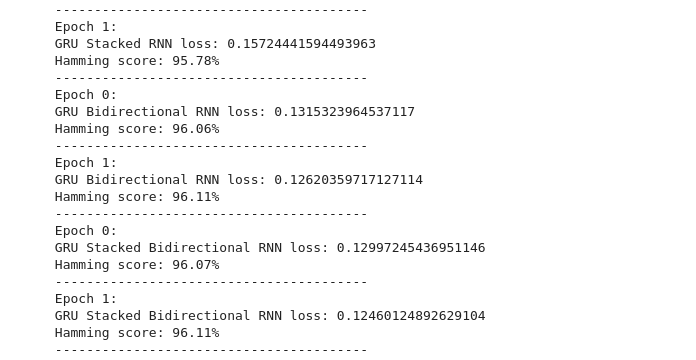

In [ ]:
for model in models:
    model.compile(
        loss=torch.nn.BCEWithLogitsLoss(),
        optimizer=keras.optimizers.Adam(
            ...
        ),
        metrics=[
            ...
        ]
    )

In [ ]:
for train_dataset, test_dataset in datasets:
    for model in models:
        model.fit(train_dataset, validation_data=test_dataset, epochs=...)

# Evaluation

Evaluate the models you trained on the test datasets. Plot ROC curves for each label (use `sklearn.metrics.RocCurveDisplay`) for each model.

In [ ]:
def plot_roc_curve(
    X: np.ndarray,
    y: np.ndarray,
    model: keras.Model,
    ax: plt.Axes | None = None
) -> float:
    '''Plots ROC curves for each of the labels (on a single axes) and outputs mean ROC AUC score.

    Arguments:
        X: model inputs
        y: ground thruths
        model: model to plot the curve for
        ax: axes to plot on

    Returns:
        Mean ROC AUC score'''

Plot the mean ROC AUC scores. Which model has the highest score? On what kind of dataset?

Inspect the best model performance closer. Come up with some sentences (in English). Does the model output sensible results?

In [ ]:
def label_text(text: str, model: keras.Model, threshold: float = 0.5, max_length: int | None = None) -> list[str]:
    '''Computes the model output for `text` and outputs a list of emotions that have a probability of at least `threshold`

    Arguments:
        text: text to label
        model: model to use
        threshold: threshold to use
        max_length: max length for tokenization
    
    Return:
        List of predicted emotion labels'''

In [ ]:
def plot_emotion_scores(text: str, model: keras.Model, max_length: int | None = None, ax: plt.Axes | None = None):
    '''Plots a bar plot of emotion probabilities for given `text` using `model`.

    Arguments:
        text: text to label
        model: model to use        
        max_length: max length for tokenization
        ax: axes to plot on'''

For each of your texts get a list of emotion labels and plot emotion scores

# Bonus

Train and evaluate the same model as your best one, but use a different cell type